## Praca domowa 4

#### Autor: Imię Nazwisko

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [164]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [165]:
##Zadanie a)
df[(df.Publisher == "Nintendo") & (df.Year>2015) & (df.NA_Sales<df.EU_Sales)]
##ODP: Teddy Together, Mario & Sonic at the Rio 2016 Olympic Games

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [166]:
##Zadanie B
df[df.Year == 2010].groupby("Genre")[["Global_Sales"]].sum().sort_values(by = "Global_Sales").tail(1)
##ODP: Action

,Global_Sales
Genre,
Action,117.64


In [167]:
##Zadanie C
df2 = df.groupby("Genre")[["JP_Sales", "EU_Sales"]].mean()
df3 = df2[df2.JP_Sales>df2.EU_Sales].reset_index()
df4 = df3[["Genre", "JP_Sales"]].sort_values(by = "JP_Sales", ascending = False).rename(columns = {"Genre": "Typ Gry", "JP_Sales":"Średnia sprzedaż w Japonii"}).reset_index()
df4[["Typ Gry", "Średnia sprzedaż w Japonii"]]

,Typ Gry,Średnia sprzedaż w Japonii
0,Role-Playing,0.238293
1,Puzzle,0.099439
2,Strategy,0.073284


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

In [168]:
from IPython.display import Image
from IPython.core.display import HTML 

## Wykres Oryginalny
Źródło: https://stat.gov.pl/obszary-tematyczne/edukacja/edukacja/szkolnictwo-wyzsze-i-jego-finanse-w-2020-roku,2,17.html

In [169]:
Image(url= "oryginalnyWykres.jpg")

## Wykres GGplot2

In [170]:
Image(url= "WykresGGplot.jpg")

Link do pd2: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/MajczykAdam/hw02_Majczyk_Adam_Raport.pdf

In [171]:
import matplotlib.pyplot as plt
import numpy as np

In [172]:
dfZad = pd.read_csv("dane.csv")
dfZad

,grupa,procent
0,biznesu i administracji,18.1
1,inżynieryjno-techniczna,8.7
2,medyczna,11.3
3,społeczna,10.3
4,pedagogiczna,6.3
5,językowa,5.2
6,pozostałe,40.1


In [173]:
dfZad2 = dfZad.sort_values(" procent", ascending = False)

In [174]:
import seaborn as sns

In [175]:
xTab = dfZad2["grupa"]
yTab = dfZad2[" procent"]

[Text(0.5, 0, 'Udział studentów [%]'), Text(0, 0.5, 'Podgrupa')]

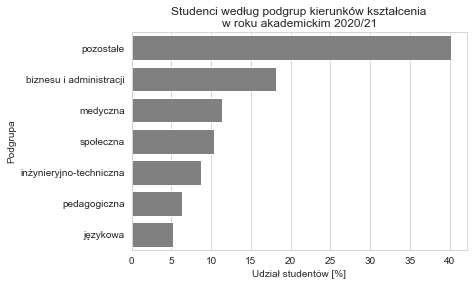

In [176]:
sns.set_style("whitegrid")
ax = sns.barplot(y = "grupa", x = " procent", data = dfZad2, color = 'grey')
ax.set_title("Studenci według podgrup kierunków kształcenia\nw roku akademickim 2020/21")
ax.set(xlabel = 'Udział studentów [%]', ylabel = 'Podgrupa')

### Dlaczego lepszy
#### Kontra ggplot2
Wykres nowy jest lepszy, gdyż nie ma zbędnego koloru (wcześniej nic on nie wnosił). Usunięte są także opisy słupków, ponieważ nie dodawały one czytelności wykresowi ggplot2 (stanowiły powielenie informacji, jaką zawiera długość słupka + grid). 

#### Kontra oryginał
Jest lepszy od wykresu pierwotnego (GUS), ze względu na czytelniejszy typ wykresu (słupki zamiast pierścienia) oraz brak zbędnych kolorów.